In [ ]:
#OK ( save the model )

In [ ]:
# https://www.datacourses.com/classification-model-evaluation-metrics-in-scikit-learn-924/


| |<font size="5">Classification  _  تصنيف البيانات </font>|
|-:|-:|
|<img src="https://www.tibco.com/blog/wp-content/uploads/2013/04/telco-churn.jpg" width=250></img>||
||<font size="4"> تحميل البيانات  </font>|
||<font size="4">  تحديد تسلسل معالجة البيانات</font>|
||<font size="4">XGBClassifier    تدريب البيانات وتقليص خصائصها </font>|
||<font size="4"> تقويم أداء الخوارزميات </font>|

In [ ]:
!nvidia-smi

Tue Nov 19 15:21:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/xgboost_customer_churn/xgboost_customer_churn.ipynb

In [2]:
pwd

'/content'

In [3]:
cd  drive/My\ Drive/ML-Course

/content/drive/My Drive/ML-Course


In [4]:
ls -la  ./data/ch*

-rw------- 1 root root 298774 Sep 21  2020 ./data/churn_1.csv
-rw------- 1 root root 437903 Jun 11  2017 ./data/churn.txt


In [5]:
ls

'An untitled mindmap'    kidney_disease.csv
 data/                   Lesson_1/
 Data/                   Lesson_2/
'Data sets'/             Lesson_3/
 Dépotoire/              Lesson_4/
 DKD2e_data_sets.zip     ML-Course_design.gsheet
 DKD2e_data_sets.zip.1  'ML DL 4 Education.gdoc'
 DKD2e_data_sets.zip.2  'ML-INIT&GitHUb.ipynb'
 DKD2e_data_sets.zip.3   ML-python-intro.ipynb
 DKD2e_data_sets.zip.4   Project_2/
 features_selected.txt   Projet_1/
 imgs/                  'Untitled mind map'
 intro_ML.gslides       'XGBoost Hyperparameter Tuning - A Visual Guide.gdoc'


In [6]:
import numpy as np
import pandas as pd


In [7]:
df= pd.read_csv('./data/churn_1.csv')

In [8]:
df.sample(5)

,Unnamed: 0,State,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
2011,2011,ID,86,415,no,no,0,194.2,98,33.01,...,95,16.47,192.0,123,8.64,9.3,7,2.51,3,False.
435,435,MT,58,510,no,yes,29,240.4,80,40.87,...,91,10.11,164.2,108,7.39,11.2,3,3.02,1,False.
2574,2574,OR,97,415,no,no,0,146.0,121,24.82,...,141,17.26,151.8,120,6.83,13.3,2,3.59,1,False.
3148,3148,WA,60,415,yes,no,0,205.9,97,35.00,...,117,23.58,202.0,139,9.09,11.0,2,2.97,0,True.
3009,3009,VA,133,408,no,yes,39,239.9,107,40.78,...,77,21.57,128.7,85,5.79,6.7,3,1.81,5,False.


In [9]:
# transform the field chunr? to binary
df['Churn?']= (df['Churn?']=='True.').astype(int)

In [10]:
X=df.drop('Churn?', axis=1)
y=df['Churn?']

In [11]:
#      تحميل البيانات

# X = pd.read_csv('./data/churn_features.csv', index_col=0)
# y=pd.read_csv('./data/churn_target.csv', index_col=0)

In [12]:
# تقسيم البيانات :  تدريب &  اختبار
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [13]:
!pip install -U scikit-learn

In [14]:
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import make_column_transformer , make_column_selector  as selector
# from sklearn.compose import

from sklearn.pipeline import make_pipeline


num_pipeline= make_pipeline(
     StandardScaler()    # تغيير سلم البيانات الرقمية
)

cat_pipeline= make_pipeline(
     OneHotEncoder(drop="if_binary", sparse_output=False)  #   بما ان جميع القيم الناقصة قد تم تعويضا فلا فائدة من معالجتها لذا نقوم هنا باسقاط احد العمودين في حالة المتغير الثنائي

)

preprocess= make_column_transformer(
     ( num_pipeline,  selector(dtype_include="number") ),  #توظيف  سلسة معالجة الباينات أعلاه على جميع البيانات الرقمية
     (cat_pipeline, selector(dtype_exclude="number")) , #category  كان بالامكان تغيير  نوع المتغيرات الى تصنيف
     remainder="passthrough"  # واسقاط باقي البيانات الغير رقمية
     )

In [15]:
# حجم البيانات الجديد
preprocess.fit_transform(X_train).shape

(2233, 70)

In [16]:
# التحقق من تحويل  البيانات
preprocess.fit_transform(X_train)

array([[ 0.70927833, -0.81498972, -0.51621471, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28389262,  0.76425984, -0.51621471, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29227381, -0.33870811,  1.7389225 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.40751516, -0.86512463, -0.68238272, ...,  0.        ,
         0.        ,  0.        ],
       [-0.86219469,  1.71682307, -0.51621471, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.56206435, -1.61714823, -0.68238272, ...,  0.        ,
         0.        ,  1.        ]])

In [17]:
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
pipe_XGBCl= make_pipeline(
    preprocess,    # تغيير سلم البيانات الرقمية
    XGBClassifier()
)

In [18]:
#pipeline  معايير
list(pipe_XGBCl.get_params().keys())

['memory',
 'steps',
 'verbose',
 'columntransformer',
 'xgbclassifier',
 'columntransformer__force_int_remainder_cols',
 'columntransformer__n_jobs',
 'columntransformer__remainder',
 'columntransformer__sparse_threshold',
 'columntransformer__transformer_weights',
 'columntransformer__transformers',
 'columntransformer__verbose',
 'columntransformer__verbose_feature_names_out',
 'columntransformer__pipeline-1',
 'columntransformer__pipeline-2',
 'columntransformer__pipeline-1__memory',
 'columntransformer__pipeline-1__steps',
 'columntransformer__pipeline-1__verbose',
 'columntransformer__pipeline-1__standardscaler',
 'columntransformer__pipeline-1__standardscaler__copy',
 'columntransformer__pipeline-1__standardscaler__with_mean',
 'columntransformer__pipeline-1__standardscaler__with_std',
 'columntransformer__pipeline-2__memory',
 'columntransformer__pipeline-2__steps',
 'columntransformer__pipeline-2__verbose',
 'columntransformer__pipeline-2__onehotencoder',
 'columntransformer__

In [19]:
from sklearn import set_config
set_config(display='diagram', )

In [20]:
param_grid = {
   'xgbclassifier__n_estimators': [50, 100, 150, 200],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgbclassifier__max_depth': range(3, 5),
    'xgbclassifier__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgbclassifier__gamma': [i/10.0 for i in range(3)],
    'xgbclassifier__scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],


}

- Generally, scale_pos_weight is the ratio of number of negative class to the positive class.

Suppose, the dataset has 90 observations of negative class and 10 observations of positive class, then ideal value of scale_pos_weight should be 9.

In [21]:
# Define cross validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)


In [22]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score ),
    'roc_auc': make_scorer(roc_auc_score)
}

### RandomizedSearchCV

![](https://adventuresindatascience.files.wordpress.com/2017/10/bb_rcv.png)

In [23]:
# %%timeit
from sklearn.model_selection import RandomizedSearchCV
RdSearch = RandomizedSearchCV(pipe_XGBCl, param_distributions=param_grid, cv=kf, verbose=3,
                                n_jobs=-1 ,scoring= scorers   , n_iter=1000 , refit="roc_auc" )

In [24]:
# التدريب
RdSearch.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipeline-1',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7c992a440a30>),
                                                                              ('pipeline-2',
                                                                               Pipeline(steps...
                                        'xgbclassifier__scale_pos_weight': [1,
                                                                            10,
                                                                            25,
                                                                            50,
                                                                            75,
                                                                            99,
                                                                            100,
                                                                            1000]},
                   refit='roc_auc',
                   scoring={'accuracy_score': make_scorer(accuracy_score, response_method='predict'),
                            'precision_score': make_scorer(precision_score, response_method='predict'),
                            'recall_score': make_scorer(recall_score, response_method='predict'),
                            'roc_auc': make_scorer(roc_auc_score, response_method='predict')},
                   verbose=3)

In [25]:
# افضل المعايير التي تم الاحتفاظ بها
RdSearch.best_params_

{'xgbclassifier__scale_pos_weight': 10,
 'xgbclassifier__n_estimators': 150,
 'xgbclassifier__max_depth': 3,
 'xgbclassifier__learning_rate': 0.2,
 'xgbclassifier__gamma': 0.2,
 'xgbclassifier__colsample_bytree': 0.2}

In [26]:
#  قائمة أفضل المعاييير
RdSearch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7c992a1fa9b0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  <skle...
                               feature_types=None, gamma=0.2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=150, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [27]:
# قياس الدقة في ضوء أفضل المعايير
f" Score {RdSearch.best_estimator_.score(X_test, y_test):.3}"

' Score 0.933'

In [28]:
y_pred=RdSearch.predict(X_test)
f'Accuracy: {accuracy_score(y_test, y_pred):.3}'

'Accuracy: 0.933'

- Recall
Recall goes another route. Instead of looking at the number of false positives the model predicted, recall looks at the number of false negatives that were thrown into the prediction mix.
$$ Recall = \frac{TP}{TP + FN}$$

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)


In [29]:
# نسبة التنبؤ  بالمقارنة مع القيم الأصلية
f'Accuracy: {recall_score(y_test, y_pred):.3}'

'Accuracy: 0.838'

In [30]:
#  Precision / recall  بين    F1  يوازن معيار القيس
from sklearn import metrics
f'Accuracy: {metrics.f1_score(y_test, y_pred):.3}'

'Accuracy: 0.784'

In [31]:
#
f"Performance sur le train : {roc_auc_score(y_train, RdSearch.predict(X_train))} "

'Performance sur le train : 0.974481707811259 '

In [32]:
# overfitting problem
f"Performance sur le train : {roc_auc_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le train : 0.893 '

In [33]:
f"Performance sur le Test : {recall_score(y_test, RdSearch.predict(X_test)):0.3} "

'Performance sur le Test : 0.838 '

In [34]:
! pip install scikit-plot

<Axes: >

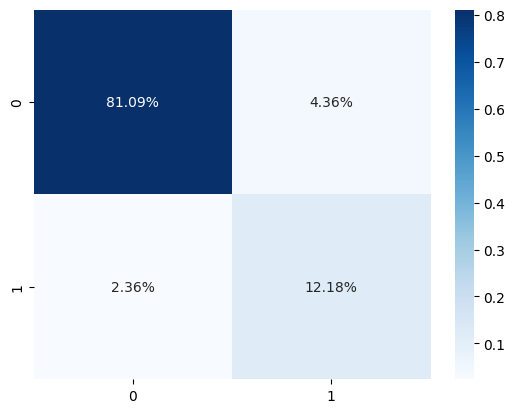

In [58]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')
# print a formated  confusion matrix


# confusion_matrix(y_test, y_pred ) #, normalize=True)

In [ ]:
# skplt.metrics.plot_confusion_matrix(y_test, y_pred ) #, normalize=True)

In [42]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       940
           1       0.74      0.84      0.78       160

    accuracy                           0.93      1100
   macro avg       0.85      0.89      0.87      1100
weighted avg       0.94      0.93      0.93      1100



Text(0.5, 1.0, 'ROC Curve')

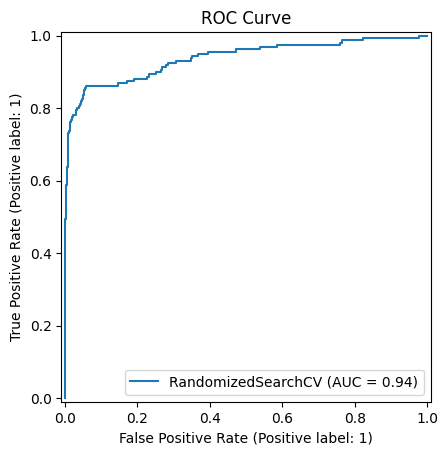

In [61]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
# Plot the ROC curve
RocCurveDisplay.from_estimator(RdSearch, X_test, y_test)
plt.title("ROC Curve")


In [62]:
#AUC    قياس درجة  دقة  التنبؤ لمعيار
f'Best AUC Score: {RdSearch.best_score_ :.3}'


'Best AUC Score: 0.862'

In [63]:
# جدول الأحتمالات
y_probas = RdSearch.predict_proba(X_test)


In [64]:
y_probas

array([[0.5506059 , 0.4493941 ],
       [0.9063189 , 0.09368108],
       [0.01714528, 0.9828547 ],
       ...,
       [0.8485019 , 0.15149805],
       [0.02703923, 0.97296077],
       [0.55194384, 0.44805616]], dtype=float32)

In [65]:
((y_probas>0.5)+0)

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]])

In [66]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [67]:
#  اشتقاق جدول التنبؤات
((y_probas>0.5)+0)[:,1]

array([0, 0, 1, ..., 0, 1, 0])

<Axes: >

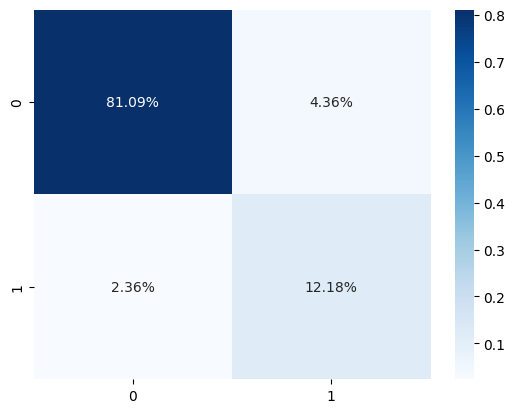

In [68]:
cf_matrix = confusion_matrix(y_test, ((y_probas>0.5)+0)[:,1])
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues')

-  اسوء نتيجة هي تلك التي تنبأ بها النموذج على أن العميل لن يقطع عقده مع شركة الاتصالات ولكنه  على عكس المتوقع قطعه.
- لذا فإن الشكرة مستعدة لتفعيل حزمة من التدابير مثا تمتيع العميل بترقية للخدمات حتى تبقي عليه .

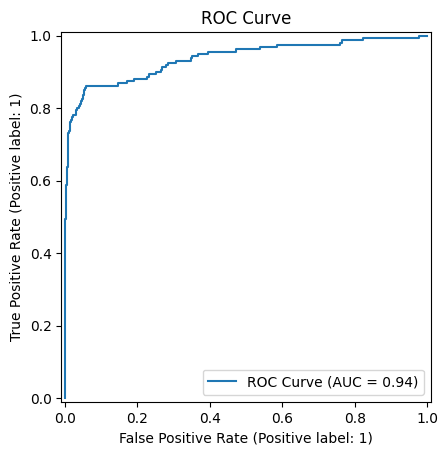

In [70]:
RocCurveDisplay.from_predictions(y_test, y_probas[:, 1], name="ROC Curve")
plt.title("ROC Curve")
plt.show()

![](https://www.researchgate.net/profile/Md_Ashraful_Amin/publication/220176738/figure/fig4/AS:669969142534168@1536744499664/The-confusion-matrix-left-and-the-calculation-of-true-positive-rate-false-positive.png)

- The ROC in the figure has a high AUC. We can also see there’s a point on the graph where TPR(sensitivity) is quite high and FPR(1-specificity) is dramatically low. If we go back and look at our business need, we needed a high TPR and low FPR that is exactly what we are getting from that point on this ROC. The threshold corresponding to that point can be said to be the best threshold value.
https://towardsdatascience.com/demystifying-confusion-matrix-29f3037b0cfa

- F1-Score
In practice, when we try to increase the precision of our model, the recall goes down, and vice-versa. The F1-score captures both the trends in a single value:

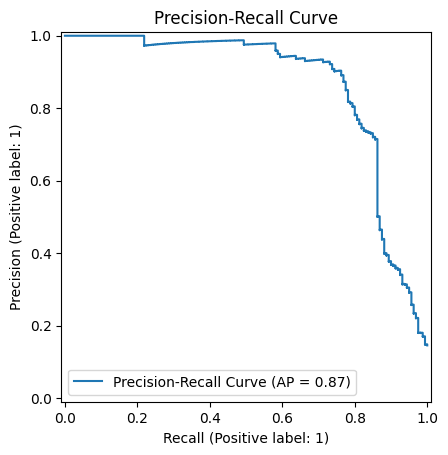

In [71]:
# skplt.metrics.plot_precision_recall_curve(y_test, y_probas, figsize=(10, 8))
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(RdSearch, X_test, y_test, name="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


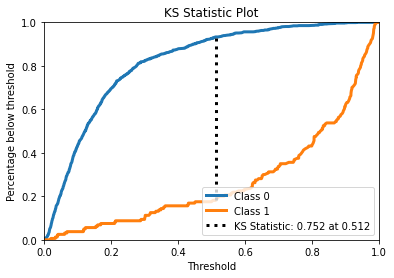

In [ ]:
# AUC تخطيط
# The K-S statistic plot, or the Kolmogorov Smirnov statistic plot, is a plot that tells you whether the model gets confused
#when it comes to predicting the different labels in your dataset

skplt.metrics.plot_ks_statistic(y_test, y_probas)

![](https://newbiettn.github.io/images/confusion-matrix-noted.jpg)

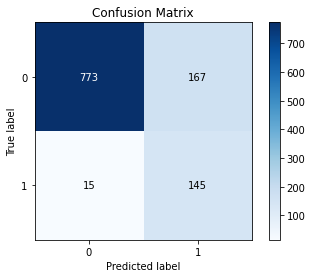

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1] ) #, normalize=True)

In [ ]:
# pickel

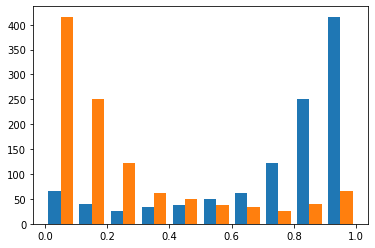

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_probas)
plt.show()

- Now coming to the business part, the Telecom company efficiently is balancing between reducing Churners (increasing TPR) and reducing wrong classification of good customers as probable Churners (lowering FPR).
- Therefore the organisation in this case can’t just rely on the **Accuracy** of the model.   

In [ ]:
metrics.confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1])

array([[773, 167],
       [ 15, 145]])

- Finding the optimal cutoff¶
It’s clear that false negatives are substantially more costly than false positives. Instead of optimizing for error based on the number of customers, we should be minimizing a cost function that looks like this:

قيمة الخسائر التي ستنمى بها شركة الاتصالات   في حالة مغادرة حرفائها

Cost  = $500 * FN(C) + $0 * TN(C) + $100 * FP(C) + $100 * TP(C)
FN(C) means that the fal

In [ ]:
np.array([[0, 100], [500, 100]])

array([[  0, 100],
       [500, 100]])

- Matrix Multiplication
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/eb/Matrix_multiplication_diagram_2.svg/313px-Matrix_multiplication_diagram_2.svg.png)

In [ ]:
 np.array([[0, 100], [500, 100]])*metrics.confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1])

array([[    0, 16700],
       [ 7500, 14500]])

In [ ]:
#
np.sum(np.array([[0, 100], [500, 100]]) *
                               metrics.confusion_matrix(y_test, ((y_probas>0.3)+0)[:,1])
                               )

38700

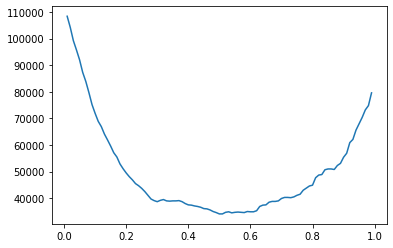

Cost is minimized near a cutoff of: 0.5 for a cost of: 34100


In [ ]:
cutoffs = np.arange(0.01, 1, 0.01)
costs = []
for c in cutoffs:
    costs.append(
        np.sum(np.array([[0, 100], [500, 100]]) *
                               metrics.confusion_matrix(y_test, ((y_probas>c)+0)[:,1])
                               )
        )


costs = np.array(costs)
plt.plot(cutoffs, costs)
plt.show()
print('Cost is minimized near a cutoff of:', cutoffs[np.argmin(costs)], 'for a cost of:', np.min(costs))

-   0.5  يتضح لنا أن افضل معيار لتحديد جدول التنبؤات والذي يقلل من تلكفة  خسار شركة الاتصالات من خلال مغادرة العملاء هو

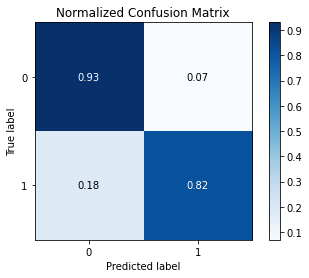

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, ((y_probas>0.5)+0)[:,1] ,  normalize=True)